In [214]:
!pip install scipy
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
import torch
from scipy import stats

  Using cached scipy-1.10.1-cp39-cp39-macosx_10_9_x86_64.whl (35.2 MB)


In [166]:
df = pd.read_csv("/Users/hokwanchu/Downloads/4801_scraper/LostAndFoundLON_clean.csv")

In [167]:
df.head()

,id,text,timestamp,replyCount,retweetCount,likeCount,quoteCount,viewCount
0,1647712404543791107,"['dad', 'lost', 'plain', 'gold', 'signet', 'ri...",2023-04-16T21:23:44+00:00,0,0,0,0,70.0
1,1647655792647057412,"['lost', 'brown', 'pair', 'moscot', 'glass', '...",2023-04-16T17:38:47+00:00,0,0,0,0,171.0
2,1647580537131868162,"['hello', 'lost', 'black', 'scotiabank', 'cred...",2023-04-16T12:39:45+00:00,0,0,0,0,55.0
3,1647348954567147520,"['hi', 'lost', 'set', 'key', 'around', 'bishop...",2023-04-15T21:19:31+00:00,0,0,0,0,58.0
4,1647279298745708546,"['lost', 'black', 'chanel', 'cardholder', 'wat...",2023-04-15T16:42:44+00:00,0,0,0,0,87.0


In [168]:
from collections import Counter
import re
def tokenize(text):
    # try:
    text.replace("\n", " ")
    # except:
    #     print(text)
    #     return 0
    N_grams =[]
    words = []
    for t in text.split(" "):
        t = re.sub(r"[^a-zA-Z0-9]", "" , t)
        if len(t) > 0:
            words.append(t)
    # unigram
    freq = Counter(words)
    freq = sorted(freq.items(), key=lambda x: x[1],reverse=True)
    N_grams.append(freq)
    # bigram
    bigram=[pair for pair in zip(words[:-1], words[1:])]
    freq = Counter(bigram)
    freq = sorted(freq.items(), key=lambda x: x[1],reverse=True)
    N_grams.append(freq)
    # trigram
    trigram=[tri for tri in zip(words[:-2], words[1:-1], words[2:])]
    freq = Counter(trigram)
    freq = sorted(freq.items(), key=lambda x: x[1],reverse=True)
    N_grams.append(freq)
    return N_grams

# tokenize(JDescp.iloc[0, -1])

In [169]:
df["tokens"] = df["text"].apply(tokenize)
df.head()



,id,text,timestamp,replyCount,retweetCount,likeCount,quoteCount,viewCount,tokens
0,1647712404543791107,"['dad', 'lost', 'plain', 'gold', 'signet', 'ri...",2023-04-16T21:23:44+00:00,0,0,0,0,70.0,"[[(dad, 1), (lost, 1), (plain, 1), (gold, 1), ..."
1,1647655792647057412,"['lost', 'brown', 'pair', 'moscot', 'glass', '...",2023-04-16T17:38:47+00:00,0,0,0,0,171.0,"[[(lost, 1), (brown, 1), (pair, 1), (moscot, 1..."
2,1647580537131868162,"['hello', 'lost', 'black', 'scotiabank', 'cred...",2023-04-16T12:39:45+00:00,0,0,0,0,55.0,"[[(credit, 2), (card, 2), (hello, 1), (lost, 1..."
3,1647348954567147520,"['hi', 'lost', 'set', 'key', 'around', 'bishop...",2023-04-15T21:19:31+00:00,0,0,0,0,58.0,"[[(hi, 1), (lost, 1), (set, 1), (key, 1), (aro..."
4,1647279298745708546,"['lost', 'black', 'chanel', 'cardholder', 'wat...",2023-04-15T16:42:44+00:00,0,0,0,0,87.0,"[[(lost, 1), (black, 1), (chanel, 1), (cardhol..."


In [170]:
df.to_csv("LostAndFoundLON_token.csv")

In [171]:
tokens_all = {}
for token in df["tokens"]:
    for i in range(3):
        for j in range(len(token[i])):
            words, count = token[i][j]
            if  words not in tokens_all:
                sum_count = count
            else:
                sum_count = count + tokens_all[words]
            tokens_all.update({words:sum_count})

In [172]:
tokens_all_sorted = dict(sorted(tokens_all.items(), key = lambda x:x[1], reverse = True))
filter_tokens = {}
buzz_word = ['lost', 'please', 'found', 'inside', 'thank', 'around', 'anyone', 'contact', 'hi', 'know', 'find', 'would', 'near', 'london', 'get', 'someone', 'somewhere', 'help', 'let', 'bu', 'really', 'hello', 'stolen', 'today', 'return', 'could', 'like', 'important', 'also', 'along', 'sunday', 'walking', 'grateful', 'work', 'yesterday', 'got', 'much', 'seen', 'took', 'ive', 'dropped', 'outside', 'way', 'including', 'great', 'item', 'may', 'either', 'sure', 'need', 'picked']
for k,v in tokens_all_sorted.items():
    if isinstance(k, tuple):
        k = ("_".join(k)).lower()
    # if v >=3 and k :
    if v >=3 and k not in buzz_word:
        filter_tokens[k] = v

In [173]:
print(len(tokens_all_sorted), len(filter_tokens))

83642 4831


In [174]:
filter_tokens

{'card': 1144,
 'black': 778,
 'key': 766,
 'wallet': 706,
 'bag': 462,
 'ring': 349,
 'id': 340,
 'gold': 319,
 'station': 301,
 'small': 286,
 'park': 279,
 'case': 273,
 'back': 268,
 'bank': 258,
 'blue': 249,
 'street': 239,
 'one': 237,
 'reward': 230,
 'phone': 223,
 'bank_card': 207,
 'purse': 206,
 'sentimental': 204,
 'name': 200,
 'road': 193,
 'driving': 191,
 'license': 189,
 'please_contact': 188,
 'lost_black': 187,
 'brown': 185,
 'white': 180,
 'leather': 180,
 'silver': 177,
 'left': 174,
 'green': 173,
 'value': 168,
 'passport': 161,
 'iphone': 156,
 'hi_lost': 153,
 'lost_wallet': 145,
 'document': 143,
 'area': 143,
 'car': 143,
 '2': 138,
 'let_know': 136,
 'red': 135,
 'sentimental_value': 127,
 'last': 125,
 'two': 125,
 'set': 116,
 'night': 115,
 'train': 114,
 'cash': 113,
 'pink': 113,
 'licence': 110,
 'please_let': 109,
 'driving_license': 108,
 'id_card': 106,
 'credit': 105,
 'please_let_know': 104,
 'bracelet': 103,
 'containing': 102,
 'picture': 101,

In [175]:
import json
with open("/Users/hokwanchu/Downloads/4801_scraper/filtered_tokens.json", "w") as f:
    json.dump(filter_tokens,f, indent=4)

In [176]:
pick = pd.read_csv("noun_adj.csv")

In [177]:
items_ls = pick["Noun"].dropna().tolist()
phrase_ls = pick["Adj"].dropna().tolist()
for item in items_ls:
    df[f"I_{item}"] = False
for phrase in phrase_ls:
    df[f"P_{phrase}"] = False
combined = []
for i in range(df["tokens"].shape[0]):
    # print(i)
    token = df.at[i,"tokens"]
    # print(token)
    combined = token[0] + token[1] + token[2]
    # print(len(combined))
    for t in combined:
        word, _ = t
        if isinstance(word, tuple):
            word = ("_".join(word)).lower()
            # print(word)
        if word in items_ls:
            # print(f"set I_{word} True")
            df.at[i,f"I_{word}"] = True
        if word in phrase_ls:
            # print(f"set P_{word} True")
            df.at[i,f"P_{word}"] = True

    # print(len(combined))
    # break

/var/folders/vg/d4dpvfj54zq1w7b5wf6xylzc0000gn/T/ipykernel_19907/2403427695.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"I_{item}"] = False
/var/folders/vg/d4dpvfj54zq1w7b5wf6xylzc0000gn/T/ipykernel_19907/2403427695.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"I_{item}"] = False
/var/folders/vg/d4dpvfj54zq1w7b5wf6xylzc0000gn/T/ipykernel_19907/2403427695.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  C

In [178]:
df.head()

,id,text,timestamp,replyCount,retweetCount,likeCount,quoteCount,viewCount,tokens,I_card,...,P_small_white,P_light_blue,P_plastic,P_navy_blue,P_prada,P_nike,P_gold_diamond,P_pandora,P_vintage,P_thick
0,1647712404543791107,"['dad', 'lost', 'plain', 'gold', 'signet', 'ri...",2023-04-16T21:23:44+00:00,0,0,0,0,70.0,"[[(dad, 1), (lost, 1), (plain, 1), (gold, 1), ...",False,...,False,False,False,False,False,False,False,False,False,False
1,1647655792647057412,"['lost', 'brown', 'pair', 'moscot', 'glass', '...",2023-04-16T17:38:47+00:00,0,0,0,0,171.0,"[[(lost, 1), (brown, 1), (pair, 1), (moscot, 1...",False,...,False,False,False,False,False,False,False,False,False,False
2,1647580537131868162,"['hello', 'lost', 'black', 'scotiabank', 'cred...",2023-04-16T12:39:45+00:00,0,0,0,0,55.0,"[[(credit, 2), (card, 2), (hello, 1), (lost, 1...",True,...,False,False,False,False,False,False,False,False,False,False
3,1647348954567147520,"['hi', 'lost', 'set', 'key', 'around', 'bishop...",2023-04-15T21:19:31+00:00,0,0,0,0,58.0,"[[(hi, 1), (lost, 1), (set, 1), (key, 1), (aro...",False,...,False,False,False,False,False,False,False,False,False,False
4,1647279298745708546,"['lost', 'black', 'chanel', 'cardholder', 'wat...",2023-04-15T16:42:44+00:00,0,0,0,0,87.0,"[[(lost, 1), (black, 1), (chanel, 1), (cardhol...",True,...,False,False,False,False,False,False,False,False,False,False


50
50


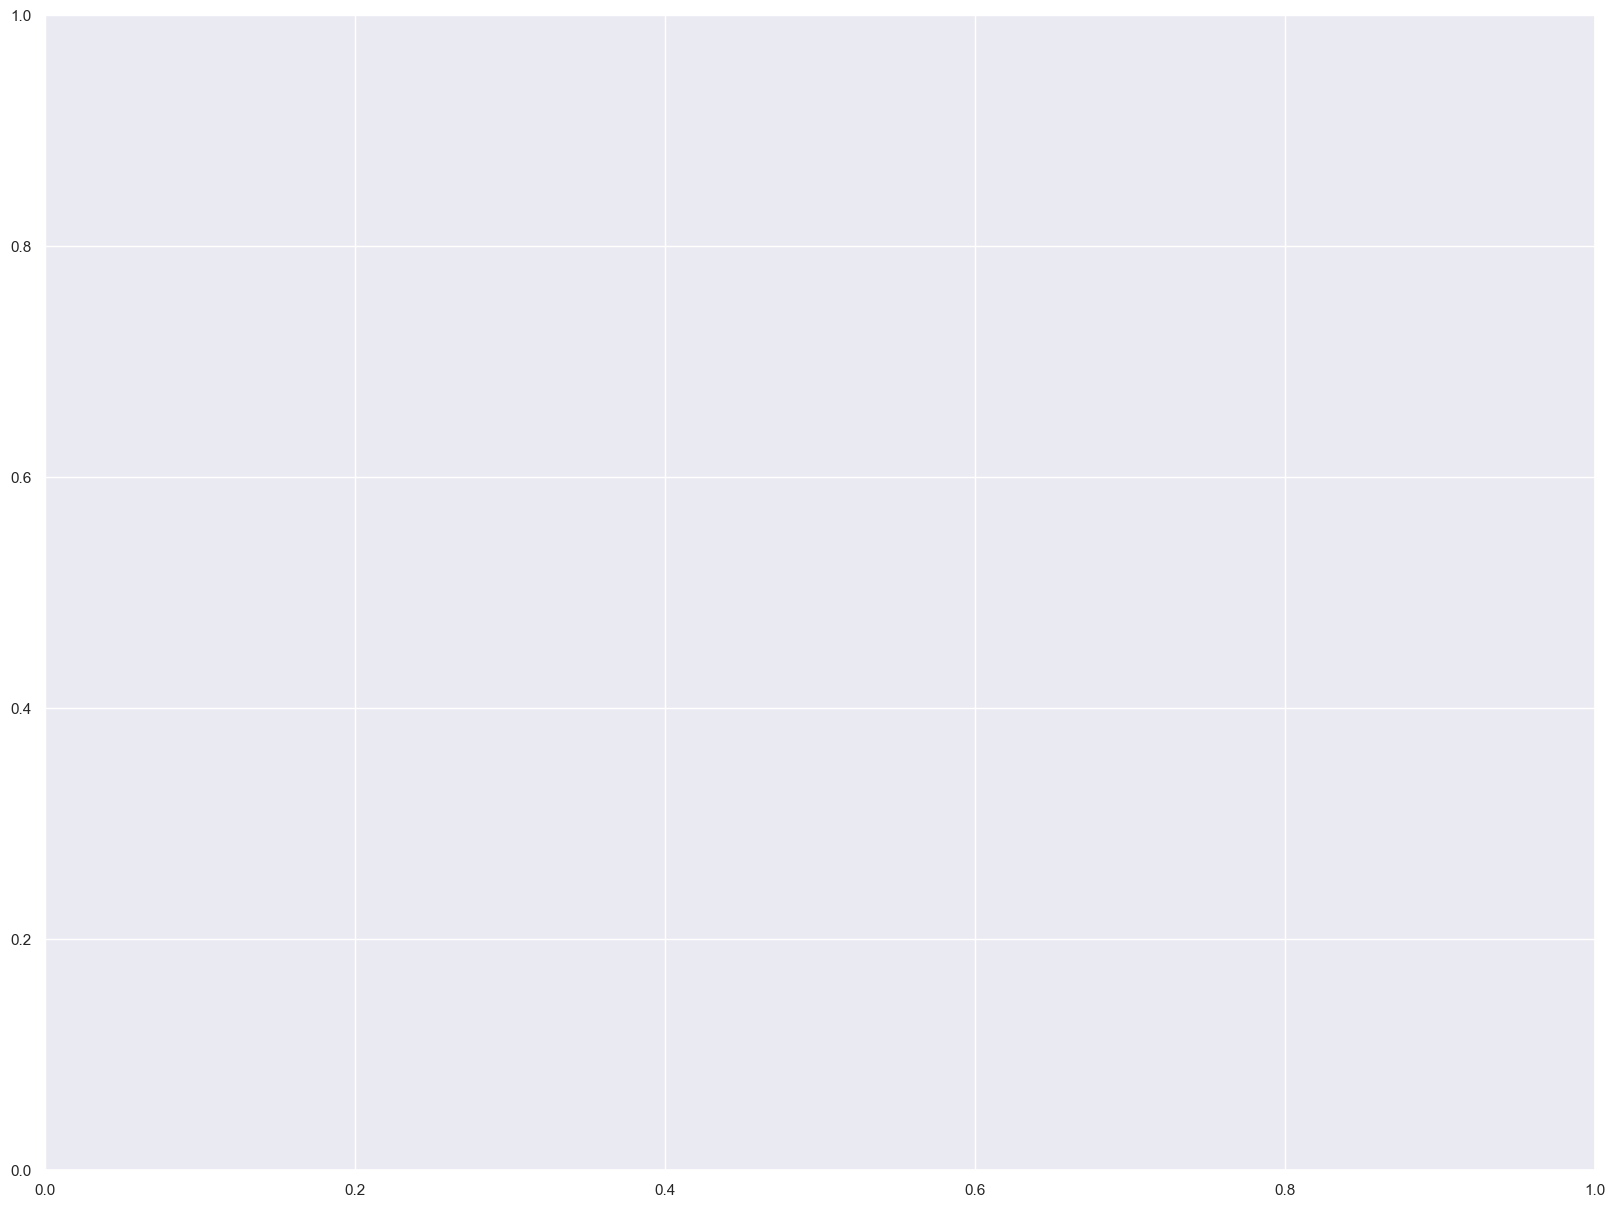

In [217]:
import matplotlib.pyplot as plt

fig , ax = plt.subplots(1, 1, figsize =(20, 15))

items_ls = pick["Noun"].dropna().tolist()[:50]
phrase_ls = pick["Adj"].dropna().tolist()[:50]


dict_ = {}

for item in items_ls[:5]:
    i_df = df[df['I_'+item] == True].dropna()
    dict_[str(item)] = i_df['viewCount'].values

for phrase in phrase_ls[:5]:
    p_df = df[df['P_'+phrase] == True].dropna()
    dict_[str(phrase)] = p_df['viewCount'].values


ax.boxplot(dict_.values())
ax.set_xticklabels(dict_.keys())

/var/folders/vg/d4dpvfj54zq1w7b5wf6xylzc0000gn/T/ipykernel_19907/2324594584.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  seaborn.distplot(df[df["viewCount"]!=0]["viewCount"])


<Axes: xlabel='viewCount', ylabel='Density'>

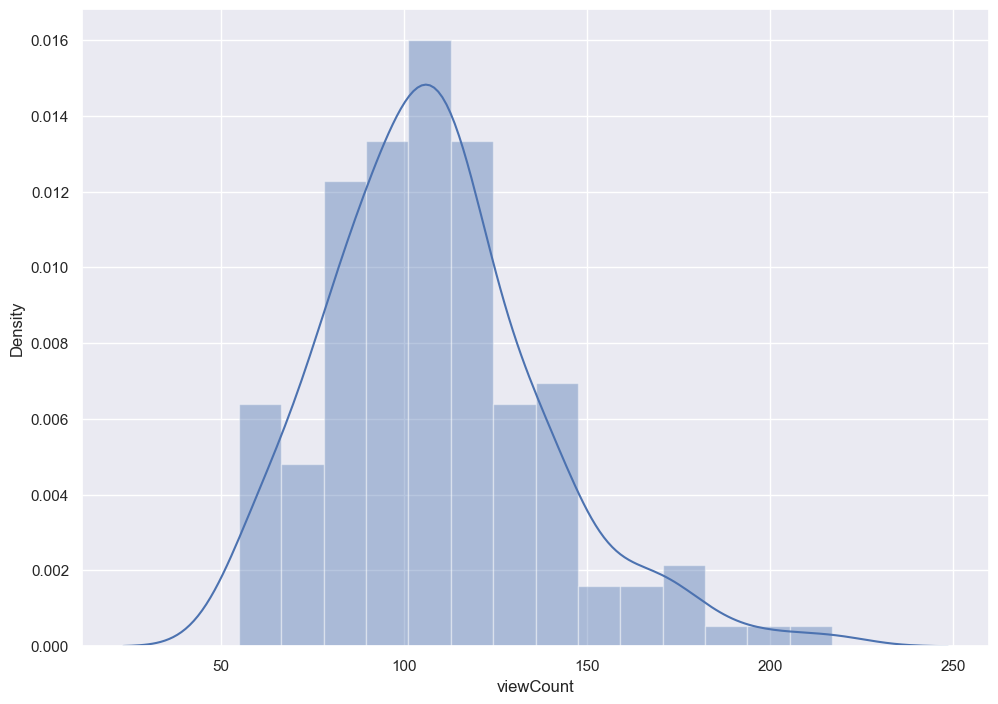

In [180]:
seaborn.distplot(df[df["viewCount"]!=0]["viewCount"])

In [181]:
outer = []
# print(items_ls)
# print(phrase_ls)

for item in items_ls:
    i_df = df[df['I_'+item] == True]
    inner = []
    for phrase in phrase_ls:
        inner.append(len(i_df[i_df['P_'+phrase] == True]))
    outer.append(inner)

[Text(0, 0, 'black'),
 Text(1, 0, 'small'),
 Text(2, 0, 'gold'),
 Text(3, 0, 'blue'),
 Text(4, 0, 'green'),
 Text(5, 0, 'white'),
 Text(6, 0, 'silver'),
 Text(7, 0, 'brown'),
 Text(8, 0, 'red'),
 Text(9, 0, 'leather'),
 Text(10, 0, 'pink'),
 Text(11, 0, 'glass'),
 Text(12, 0, 'grey'),
 Text(13, 0, 'old'),
 Text(14, 0, 'dark'),
 Text(15, 0, 'square'),
 Text(16, 0, 'cros'),
 Text(17, 0, 'yellow'),
 Text(18, 0, 'purple'),
 Text(19, 0, 'light'),
 Text(20, 0, 'small_black'),
 Text(21, 0, 'black_leather'),
 Text(22, 0, 'rose'),
 Text(23, 0, 'rose_gold'),
 Text(24, 0, 'metal'),
 Text(25, 0, 'huge'),
 Text(26, 0, 'large'),
 Text(27, 0, 'new'),
 Text(28, 0, 'engraved'),
 Text(29, 0, 'white_gold'),
 Text(30, 0, 'king_cros'),
 Text(31, 0, 'golden'),
 Text(32, 0, 'brown_leather'),
 Text(33, 0, 'orange'),
 Text(34, 0, 'small_gold'),
 Text(35, 0, 'thin'),
 Text(36, 0, 'dark_blue'),
 Text(37, 0, 'hard'),
 Text(38, 0, 'loui_vuitton'),
 Text(39, 0, 'black_white'),
 Text(40, 0, 'small_white'),
 Text(41,

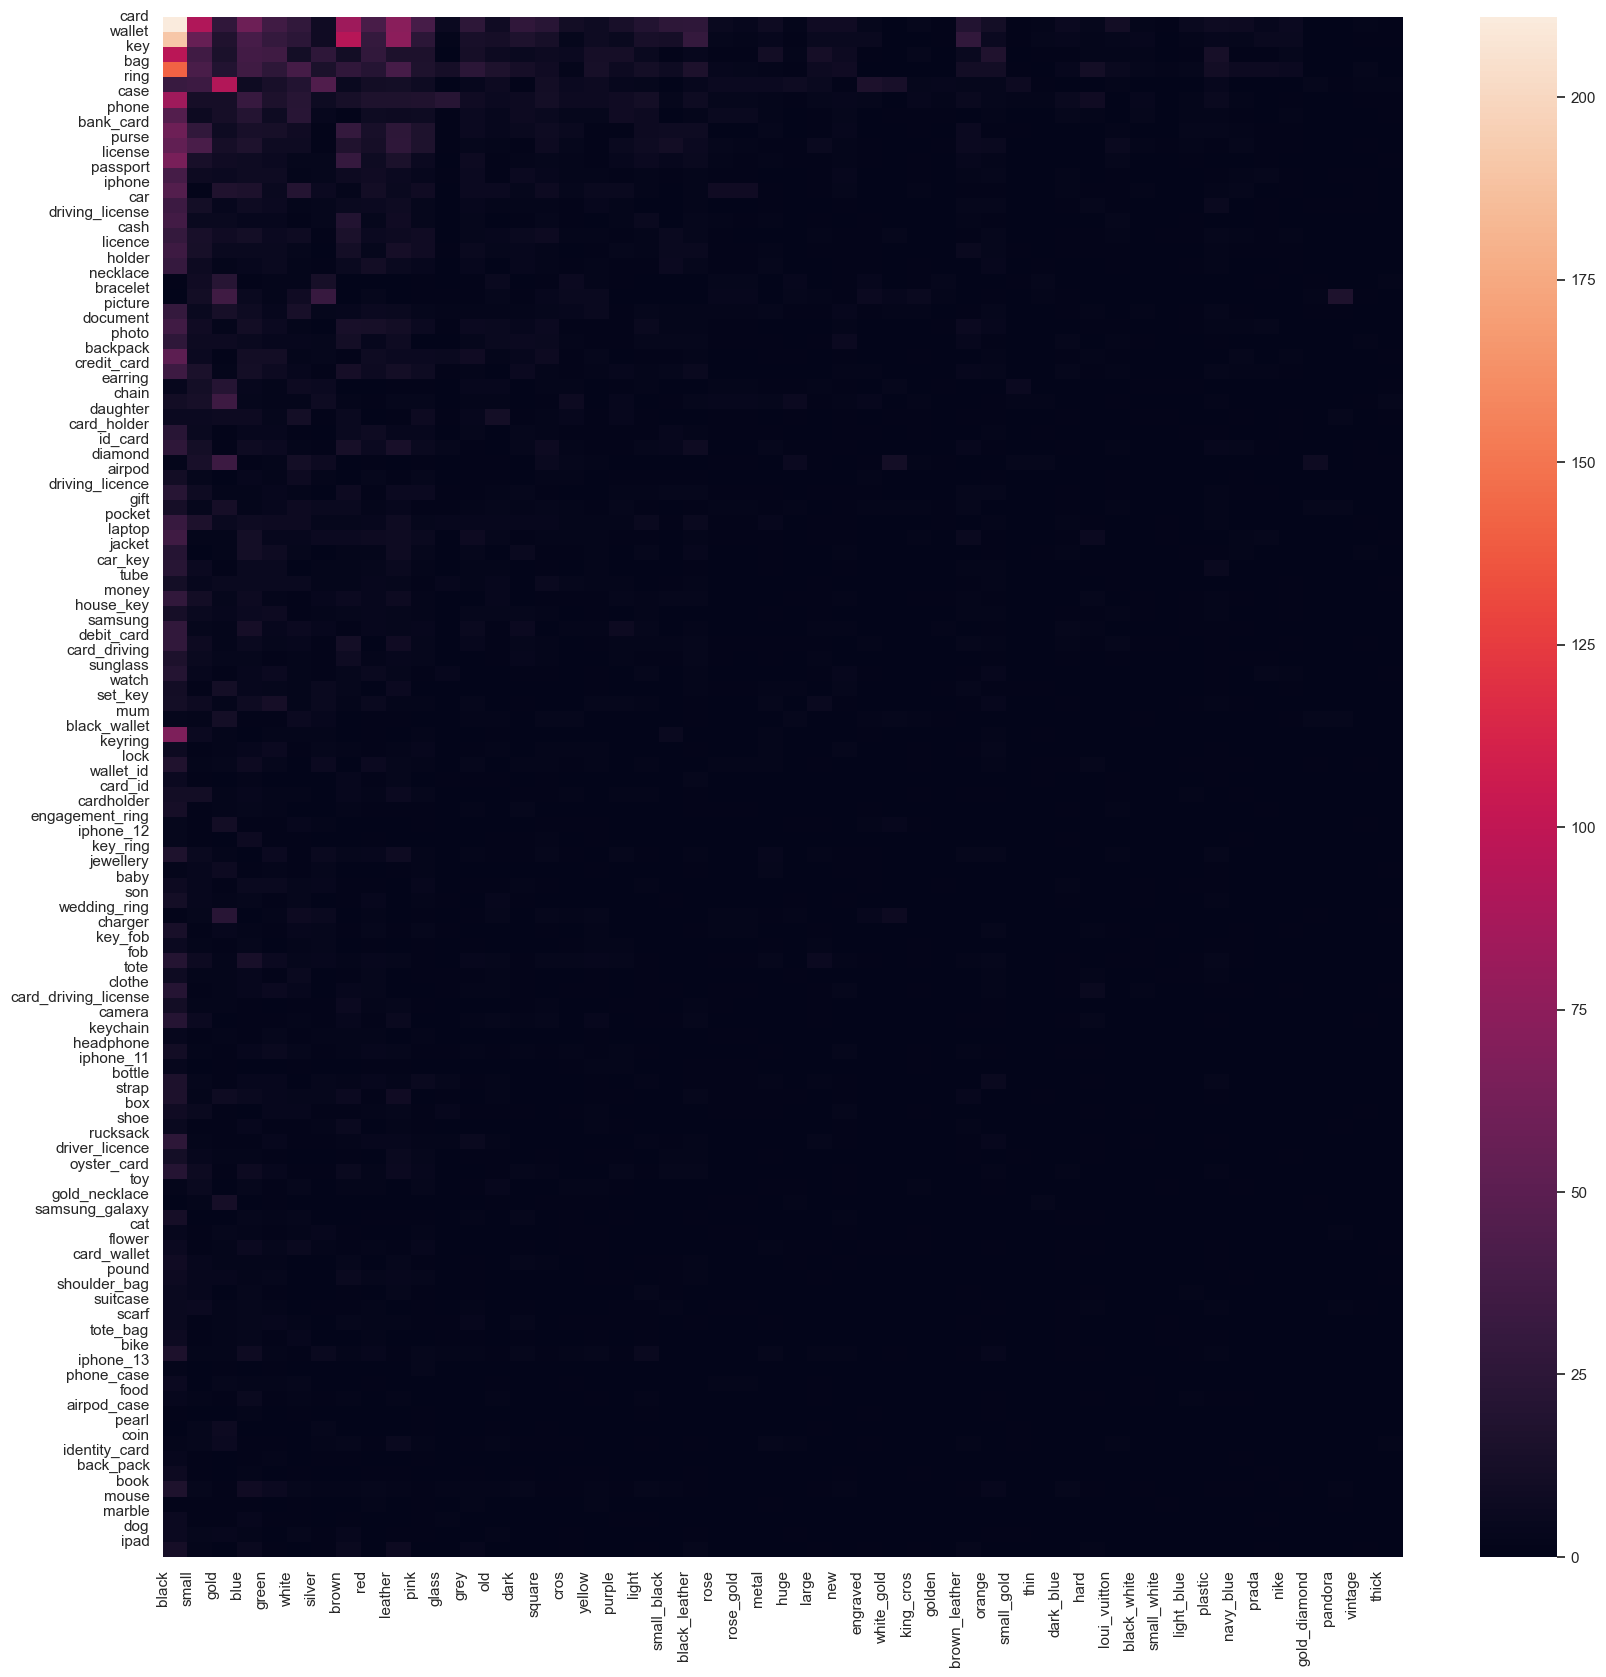

In [183]:
plt.figure(figsize=(20,20))
graph = seaborn.heatmap(data = outer)
graph.set_yticks(range(len(items_ls))) 
graph.set_yticklabels(items_ls, rotation=0)
graph.set_xticks(range(len(phrase_ls))) 
graph.set_xticklabels(phrase_ls, rotation=90)


/Users/hokwanchu/Downloads/4801_scraper/venv/lib/python3.9/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


[Text(0, 0, 'item frequency'), Text(0, 1, 'phrase frequency')]

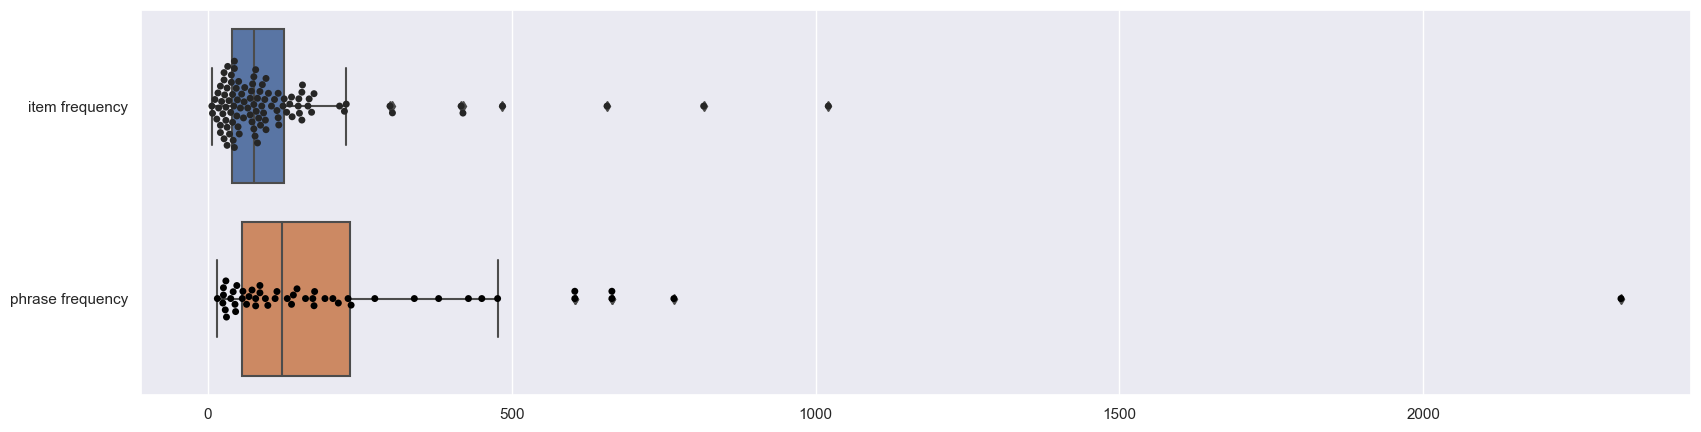

In [184]:
item_sum_list = []
for i in outer:
    sum = 0
    for p in i:
        sum += p
    item_sum_list.append(sum)

pharse_sum_list = []
for p in range(len(outer[0])):
    sum = 0
    for i in range(len(outer)):
        sum += outer[i][p]
    pharse_sum_list.append(sum)

# print(item_sum_list)
# print(pharse_sum_list)

plt.figure(figsize=(20,5))

g = seaborn.boxplot(data = [item_sum_list, pharse_sum_list], orient="h")
g = seaborn.swarmplot(data = [item_sum_list, pharse_sum_list], color = "black", orient="h")
g.set_yticks(range(2))
g.set_yticklabels(["item frequency", "phrase frequency"], rotation=0)


In [216]:
print(np.mean(pharse_sum_list))
print(stats.mode(pharse_sum_list))
print(np.median(pharse_sum_list))

235.52
ModeResult(mode=array([26]), count=array([2]))
122.5


/var/folders/vg/d4dpvfj54zq1w7b5wf6xylzc0000gn/T/ipykernel_19907/2637042291.py:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print(stats.mode(pharse_sum_list))


In [212]:
outer_torch = torch.tensor(outer)
topk = torch.topk(outer_torch.flatten(), 100)
values = topk.values
indices = topk.indices

most_freq_matches = pd.DataFrame(columns=["item", "phrase", "frequency"])
for idx in range(len(indices)):
    indice = indices[idx]
    value = int(values[idx])
    row = int(indice//outer_torch.shape[-1])
    col = int(indice%outer_torch.shape[-1])
    data = {"item": items_ls[row], "phrase": phrase_ls[col], "frequency": value}
    most_freq_matches = pd.concat([most_freq_matches, pd.DataFrame([data])], ignore_index=True)

most_freq_matches.to_csv('/Users/hokwanchu/Downloads/4801_scraper/most_freq_matches.csv')




In [186]:
df.to_csv("LostAndFoundLON_count.csv")

In [187]:
one_hot = []
for item in items_ls:
    one_hot.append(f"I_{item}")
for phrase in phrase_ls:
    one_hot.append(f"P_{phrase}")

In [188]:
df_one_hot = df[one_hot]
df_one_hot.head()

,I_card,I_wallet,I_key,I_bag,I_ring,I_case,I_phone,I_bank_card,I_purse,I_license,...,P_small_white,P_light_blue,P_plastic,P_navy_blue,P_prada,P_nike,P_gold_diamond,P_pandora,P_vintage,P_thick
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [189]:
# df_one_hot[df["I_bottle"]==True]

In [190]:
one_hot = df_one_hot.corr()
one_hot.to_csv("one_hot.csv")

<Axes: >

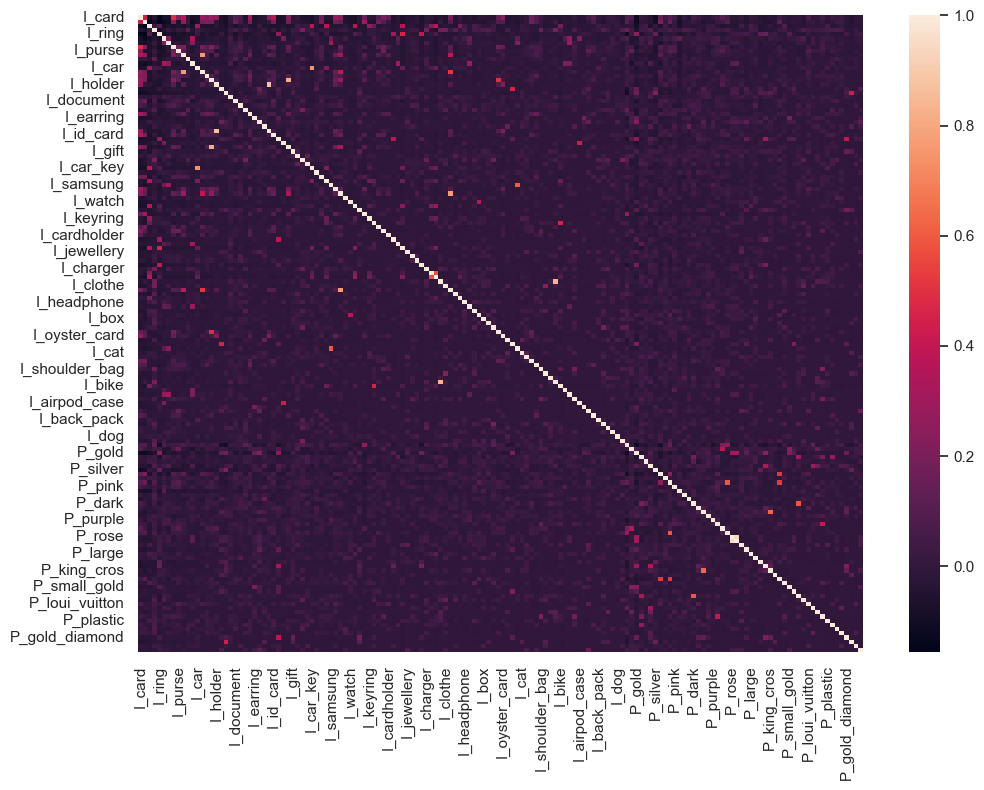

In [191]:
seaborn.heatmap(data = df_one_hot.corr())

In [192]:
df_one_hot.corr() > 0.5

,I_card,I_wallet,I_key,I_bag,I_ring,I_case,I_phone,I_bank_card,I_purse,I_license,...,P_small_white,P_light_blue,P_plastic,P_navy_blue,P_prada,P_nike,P_gold_diamond,P_pandora,P_vintage,P_thick
I_card,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
I_wallet,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
I_key,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
I_bag,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
I_ring,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P_nike,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
P_gold_diamond,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
P_pandora,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
P_vintage,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [193]:
test_df = df_one_hot.corr()

corr_dict = {}

for column in test_df:
    for index, row in test_df.iterrows():
        if (("I_" in column) and ("I_" in index)) or (("P_" in column) and ("P_" in index)):
            pass
        else:
            pair_1 = column+'_and_'+index
            pair_2 = index+'_and_'+column
            if (column=="I_card" and index=="P_black_leather") or (column=="P_black_leather" and index=="I_card"):
                print(pair_1)
                print(row[1])
            if pair_1 not in corr_dict and pair_2 not in corr_dict:
                if row[1] > 0.1:
                    corr_dict[pair_1] = row[1]

# dict

with open('/Users/hokwanchu/Downloads/4801_scraper/common.json', 'w') as f:
    json.dump(corr_dict, f, indent=4)
            

    


I_card_and_P_black_leather
0.09399049503760293
P_black_leather_and_I_card
0.44654960244038866
